
# Importing Required Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Loading Data file

In [80]:
P2_data = pd.read_csv('E:/Machine learning Assignment/CE802_P2_Data.csv')
P2_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-1.23,3.5390,-9.3000,1790.680,-5.6516,3501.98,2.9934,-0.57060,0,-1814.35,...,160.8874,6.4308,-44596.830,-8.4228,-129.147,2947.14,12.1050,-2.473600,NaN,False
1,-1.23,3.6255,-8.5150,2078.580,-12.1280,2880.88,5.3400,-1.17870,1,-3528.65,...,162.0042,8.9960,-44648.430,-9.1352,942.750,1812.46,9.7653,-1.883920,-13.05,False
2,-4.23,3.7488,-5.1830,1661.386,-6.6568,3224.18,3.1860,-4.16400,0,-2019.95,...,161.6324,6.2560,-44388.540,-10.6760,-445.770,1568.94,9.6048,-3.570600,NaN,False
3,-4.23,4.5770,-13.5076,1721.000,-6.1650,3818.78,4.3329,-6.31800,1,-2637.55,...,167.0780,6.4616,-44291.700,-9.0568,707.550,2693.14,11.6637,-2.440000,NaN,True
4,-1.23,3.6344,-9.2120,1807.380,-6.0992,2797.64,2.6697,-1.21410,0,-1953.15,...,167.5520,13.9400,-44189.862,-8.0792,-1712.850,2056.94,10.4574,-2.423400,-14.82,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-4.23,4.1957,-14.5627,1509.380,-7.3280,2630.54,3.6069,-1.12290,0,-2308.25,...,188.4800,7.9422,-44092.740,-8.2446,-961.050,1865.08,14.4300,-1.792400,NaN,False
996,-1.23,5.8360,-9.1400,1711.980,-8.3840,3191.48,7.4400,-2.55840,0,-2475.84,...,183.8000,7.0574,-44772.030,-8.4474,187.050,2065.54,10.2819,-1.855980,-14.46,False
997,-4.23,7.5000,-24.5600,1764.550,-6.4070,3270.78,10.0800,-3.49800,1,-2550.76,...,185.2200,6.5926,-44226.120,-8.2322,712.350,1609.54,13.6890,-1.740332,-13.04,False
998,-1.23,4.1924,-22.4320,1700.920,-5.4573,2768.15,6.3330,-5.69700,1,-2530.41,...,189.1400,12.9120,-44378.610,-9.2420,177.450,2261.94,12.2190,-2.806000,NaN,True


# Pre-Processing:


In [81]:
P2_data.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64

In [82]:
P2_data.duplicated().sum()

0

In [83]:
P2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   int64  
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   int64  
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   1000 non-null   bool   
dtypes

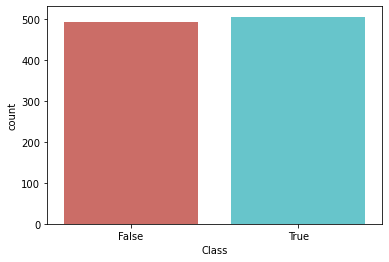

In [84]:
sns.countplot(x='Class',data=P2_data,palette='hls')
plt.show()

In [85]:
P2_data.groupby('Class').mean()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
Class,,,,,,,,,,,,,,,,,,,,,
False,-2.754291,4.353128,-14.577644,1754.360932,-7.172993,2925.535241,4.682978,-3.351987,0.475709,-2511.678342,...,0.491903,179.894365,8.028366,-44467.451941,-9.406107,813.789873,1965.942147,12.166351,-2.733196,-14.362731
True,-2.878221,4.441556,-14.308997,1748.403345,-7.147367,2926.100991,4.585773,-3.195640,0.486166,-2521.196608,...,0.521739,181.772297,7.887754,-44153.025443,-9.648419,731.869477,2424.342273,12.046682,-2.684444,-15.459920


# Converting Class Category to Numeric Representation

In [87]:
P2_data['Class']= pd.factorize(P2_data['Class'])[0]

In [88]:
P2_data['Class']

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    1
999    0
Name: Class, Length: 1000, dtype: int64

In [89]:
P2_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-1.23,3.5390,-9.3000,1790.680,-5.6516,3501.98,2.9934,-0.5706,0,-1814.35,...,160.8874,6.4308,-44596.830,-8.4228,-129.147,2947.14,12.1050,-2.47360,NaN,0
1,-1.23,3.6255,-8.5150,2078.580,-12.1280,2880.88,5.3400,-1.1787,1,-3528.65,...,162.0042,8.9960,-44648.430,-9.1352,942.750,1812.46,9.7653,-1.88392,-13.05,0
2,-4.23,3.7488,-5.1830,1661.386,-6.6568,3224.18,3.1860,-4.1640,0,-2019.95,...,161.6324,6.2560,-44388.540,-10.6760,-445.770,1568.94,9.6048,-3.57060,NaN,0
3,-4.23,4.5770,-13.5076,1721.000,-6.1650,3818.78,4.3329,-6.3180,1,-2637.55,...,167.0780,6.4616,-44291.700,-9.0568,707.550,2693.14,11.6637,-2.44000,NaN,1
4,-1.23,3.6344,-9.2120,1807.380,-6.0992,2797.64,2.6697,-1.2141,0,-1953.15,...,167.5520,13.9400,-44189.862,-8.0792,-1712.850,2056.94,10.4574,-2.42340,-14.82,0


## Filling Null Values 


In [76]:
P2_data["F21"].fillna(P2_data["F21"].mean(skipna=True), inplace=True)

In [77]:
P2_data.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21      0
Class    0
dtype: int64

In [78]:
plt.figure(figsize=(50,30))
sns.pairplot(P2_data, hue = 'Class')
plt.show()

<Figure size 3600x2160 with 0 Axes>

KeyboardInterrupt: 

In [ ]:
x = P2_data.loc[:, P2_data.columns != 'Class']
y = P2_data.loc[:, 'Class']

In [ ]:
corr=x.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# split x and y into training and validation sets

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [ ]:
x_train.shape, x_valid.shape

# Decision Tree Classifier

In [19]:
Tree = DecisionTreeClassifier()


# fit the model
Tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = Tree.predict(x_valid)

# Evaluating Model(Validation)

In [21]:
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.83


In [22]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        92
           1       0.86      0.82      0.84       108

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



In [23]:
print(confusion_matrix(y_valid,y_pred, labels=[1,0]))

[[89 19]
 [15 77]]


# Visualising Decision Tree

In [24]:
from sklearn import tree
text_representation = tree.export_text(Tree)
print(text_representation)

|--- feature_17 <= 1902.34
|   |--- feature_10 <= 11288.40
|   |   |--- feature_8 <= 0.50
|   |   |   |--- feature_0 <= -2.73
|   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |--- feature_1 <= 3.55
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  3.55
|   |   |   |   |   |   |--- feature_12 <= 214.98
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_12 >  214.98
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -2.73
|   |   |   |   |--- feature_4 <= -5.37
|   |   |   |   |   |--- feature_18 <= 9.20
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_18 >  9.20
|   |   |   |   |   |   |--- feature_13 <= 10.33
|   |   |   |   |   |   |   |--- feature_14 <= -44320.74
|   |   |   |   |   |   |   |   |--- feature_14 <= -44357.98
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |

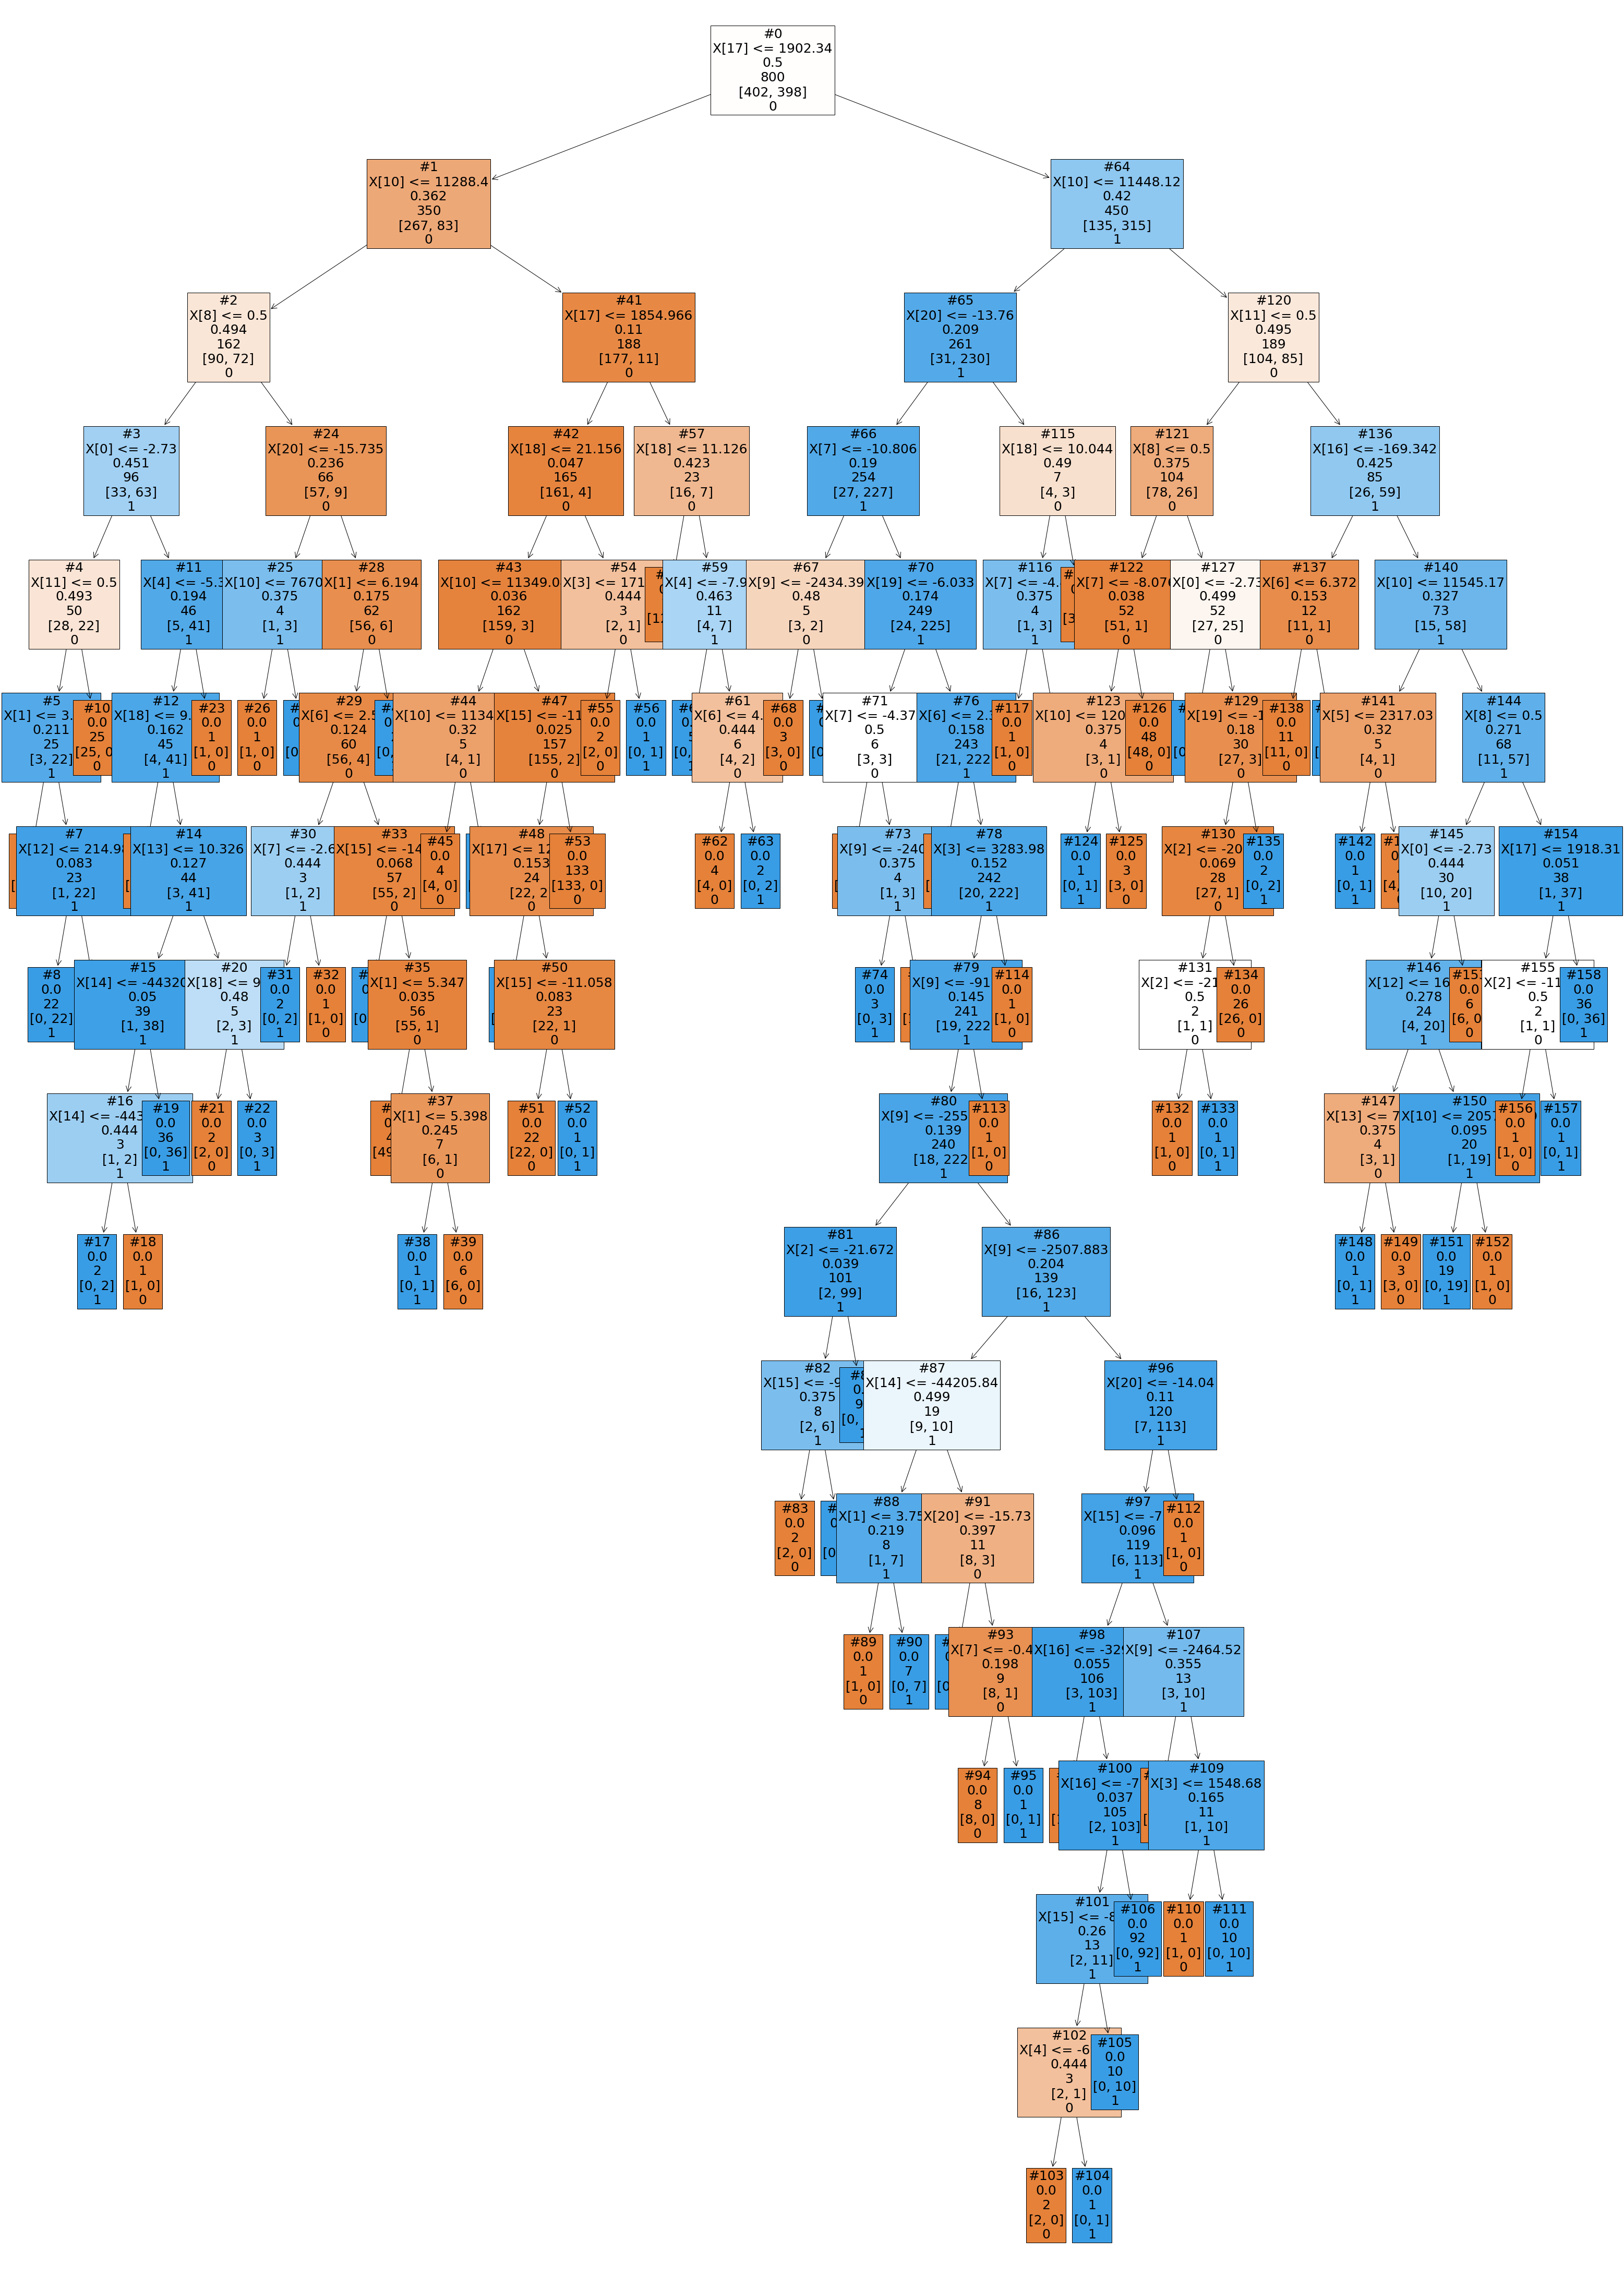

In [25]:
fig = plt.figure(figsize=(55,80))
DT=tree.plot_tree(Tree,label='Class',node_ids=True,filled=True,fontsize = 25,class_names=['0','1'])


# ---------------------------------------------------------------------------------------------------------------

# Logistic Regression

In [26]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [27]:
scaler = MinMaxScaler()

In [28]:
x_train_scaled = scaler.fit_transform(x_train)

In [29]:
x_valid_scaled=scaler.fit_transform(x_valid)

In [30]:
pca = PCA(.96)

In [31]:
pca.fit(x_train_scaled)

PCA(n_components=0.96)

In [32]:
pca.n_components_

14

In [33]:
x_train_pca = pca.transform(x_train_scaled)
x_valid_pca = pca.transform(x_valid_scaled)

In [34]:
logreg = LogisticRegression()
logreg.fit(x_train_pca, y_train)

LogisticRegression()

In [35]:
y_pred_2=logreg.predict(x_valid_pca)


In [36]:
print(classification_report(y_valid,y_pred_2))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70        92
           1       0.77      0.60      0.68       108

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.71      0.69      0.69       200



In [37]:
con_mat = metrics.confusion_matrix(y_valid,y_pred_2)
print(con_mat)

[[73 19]
 [43 65]]


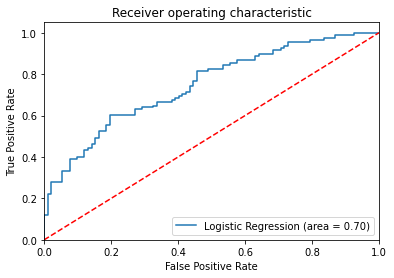

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_valid, logreg.predict(x_valid_pca))
fpr, tpr, thresholds = roc_curve(y_valid,logreg.predict_proba(x_valid_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# -------------------------------------------------------------------------------------------------------------

# Classification using Support Vector Machine

In [39]:
from sklearn import svm

In [40]:
clf = svm.SVC(kernel='linear')

In [41]:
model=clf.fit(x_train_scaled, y_train)

In [42]:
y_pred_3=clf.predict(x_valid_scaled)

In [43]:
print(classification_report(y_valid,y_pred_2))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70        92
           1       0.77      0.60      0.68       108

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.71      0.69      0.69       200



In [44]:
clf.support_vectors_

array([[1.        , 0.33738697, 0.35129014, ..., 0.34418332, 0.99988836,
        0.50462261],
       [0.        , 0.09844537, 0.13847477, ..., 0.02643264, 0.99964628,
        0.50462261],
       [0.        , 0.03303042, 0.        , ..., 0.25555944, 0.80405652,
        0.50462261],
       ...,
       [0.        , 0.40487327, 0.71175459, ..., 0.41281001, 0.99935889,
        0.50462261],
       [0.        , 0.19098846, 0.38715596, ..., 0.066427  , 0.93569972,
        0.50462261],
       [0.        , 0.01400953, 0.57138761, ..., 0.34009299, 0.99428516,
        0.70484581]])

 get number of support vectors for each class

In [45]:
clf.n_support_

array([321, 319])

In [46]:
print(classification_report(y_valid,y_pred_3))

              precision    recall  f1-score   support

           0       0.54      0.95      0.69        92
           1       0.87      0.31      0.46       108

    accuracy                           0.60       200
   macro avg       0.71      0.63      0.58       200
weighted avg       0.72      0.60      0.57       200



In [47]:
con_mat = metrics.confusion_matrix(y_valid,y_pred_3)
print(con_mat)

[[87  5]
 [74 34]]


# ----------------------------------------------------------------------------------------------------

# Test Data With Decision Tree Model

In [125]:
Test_data = pd.read_csv('E:/Machine learning Assignment/CE802_P2_Test.csv')
Test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-4.23,3.5690,-10.0000,1893.280,-6.8080,2724.529,8.88000,-0.9360,1,-3685.65,...,169.0580,7.2638,-44195.010,-14.2980,196.65,2282.340,13.1880,-3.36720,-15.33,NaN
1,-1.23,5.1630,-13.9136,1732.800,-7.0556,3022.180,4.85550,-4.5180,1,-2601.09,...,171.6300,7.2796,-44109.960,-8.0624,3825.75,2118.340,9.8838,-1.84782,-15.89,NaN
2,-1.23,3.5449,-19.3010,1774.480,-7.1680,2893.580,7.81500,-1.2855,0,-1614.75,...,172.5280,9.0520,-43170.330,-7.9820,-2326.65,1853.768,10.2369,-1.74047,-14.50,NaN
3,-4.23,3.8824,-13.7104,1674.432,-5.5178,2753.490,8.20800,-4.9230,0,-2401.55,...,176.1340,9.0580,-44206.470,-9.6200,-32.01,2850.740,16.9230,-4.09200,NaN,NaN
4,-4.23,3.9459,-18.1570,2020.380,-6.6124,2762.410,2.46945,-0.7806,1,-2818.95,...,172.4120,9.1220,-44451.990,-9.9120,504.45,1985.000,21.3450,-1.90222,-14.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-4.23,3.5418,-14.0846,1703.610,-8.0300,3384.580,2.82630,-6.2940,1,-2824.55,...,198.2600,6.7014,-44135.163,-7.9926,2515.95,2102.940,11.0721,-1.76342,-14.33,NaN
996,-1.23,5.0660,-20.0440,1752.360,-6.1738,2775.050,3.94170,-2.0589,1,-2563.04,...,175.3560,10.6720,-45446.130,-9.9100,454.65,2772.140,12.9480,-1.91410,NaN,NaN
997,-1.23,3.5006,-13.6174,1674.649,-5.4415,2762.810,4.52190,-12.2370,0,-2991.05,...,163.4300,7.1542,-44212.410,-9.6440,734.25,5523.540,9.8154,-1.78484,-13.77,NaN
998,-1.23,6.1800,-9.7680,1712.830,-7.8800,2782.050,3.04680,-1.1454,1,-2472.87,...,221.8800,11.9580,-44115.450,-8.0104,144.03,2108.940,9.5343,-4.18800,-15.58,NaN


In [126]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   int64  
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   int64  
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   0 non-null      float64
dtypes

In [127]:
Test_data["F21"].fillna(Test_data["F21"].mean(skipna=True), inplace=True)

In [128]:
x_Test = Test_data.loc[:, Test_data.columns != 'Class']
y_Test = Test_data.loc[:,'Class']

In [129]:
x_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   int64  
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   int64  
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     1000 non-null   float64
dtypes: float64(19), int64(2)
memory usage:

In [130]:
x_Test.isnull().sum()

F1     0
F2     0
F3     0
F4     0
F5     0
F6     0
F7     0
F8     0
F9     0
F10    0
F11    0
F12    0
F13    0
F14    0
F15    0
F16    0
F17    0
F18    0
F19    0
F20    0
F21    0
dtype: int64

In [131]:
y_sol = Tree.predict(x_Test)

In [132]:
y_sol

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [133]:
Test_data['Class']=y_sol

In [134]:
print("Accuracy:",metrics.accuracy_score(y, y_sol))

Accuracy: 0.54


In [136]:
Test_data.to_csv('CE802_P2_Test_Predictions.csv')